# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


## Loading the dataset

In [2]:
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
## let's check the first 5 rows and last 5 rows in the data
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [5]:
## let's check the dataset shape/size using shape method

print (f' the data has {df.shape[0]} rows and {df.shape[1]} columns. ')

 the data has 3454 rows and 15 columns. 


In [6]:
## now let's dig more into the dataset and get more info using info function().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations
- the dataset looks like combination of numerical and categorical data (4 cat. data as object, and 11 num. as 9 float64 and 2 int64.
- there are missing data in 6 columns, will sorted out later in this notebook.

In [7]:
## let's describe the data by knowing upon the 5 summury stats. using describe func().
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.71,3.81,5.08,12.70,12.83,15.34,30.71
main_camera_mp,3275.0,9.46,4.82,0.08,5.00,8.00,13.00,48.00
selfie_camera_mp,3452.0,6.55,6.97,0.00,2.00,5.00,8.00,32.00
int_memory,3450.0,54.57,84.97,0.01,16.00,32.00,64.00,1024.00
ram,3450.0,4.04,1.37,0.02,4.00,4.00,4.00,12.00
battery,3448.0,3133.40,1299.68,500.00,2100.00,3000.00,4000.00,9720.00
weight,3447.0,182.75,88.41,69.00,142.00,160.00,185.00,855.00
release_year,3454.0,2015.97,2.30,2013.00,2014.00,2015.50,2018.00,2020.00
days_used,3454.0,674.87,248.58,91.00,533.50,690.50,868.75,1094.00
normalized_used_price,3454.0,4.36,0.59,1.54,4.03,4.41,4.76,6.62


#### Obseravtions
 - we observe that normalized new price mean is 5.23 and used one is 4.36 which seems to be not much difference.
 - we observe that both norm. new and used price have outliers looking to min, max and median, espically in used price as min amount showing a little bit less than new one.
 - by looking to std.dev of both new and used prices, they might have a shape close to be normal dist. but not a perfect one with outliers.
 - there is a huge difference between min & max in days used. 
 - 50% of the phones have 3000 mAh Energy capacity and max is 9720
 - looks like most of the phones have 4GB ram as the mode of that column.
 - 50% of the phones have 32 int.memory and max is 1024.
 - the highest megapixels in main camers is 48 and selfie is 32.
 - 50% of screen size at 12.83 and max is 30.71 cm

In [8]:
## now, let's check duplicated values

df.duplicated().sum()

0

In [9]:
## seems that no duplicated value, let's check for missing date aswell and see how to treat them.

In [10]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations
- seems to be 6 columns have missing values, will be visualizing them further to see the best way to treat them by doing below EDA analysis.

### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### 1 - Univariate Analysis

#### 1.1 Creation customized Graph/plot for numerical values.
- let's do univatiate analysis to the available columns in the datasets.
-  for such, we may create customized graph combined between histogram and boxblot for each column to give us-
-  a clear picture about the data distribution and outliers.
-  will use def function to create histogram_boxplot, it will have 2 subplots sharing same x-axis(hist & box.plot)  - also, will show the mean and median in each subplot.

In [11]:
# will create the function
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

# will create the subplots and format the grid size/features. 
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  sharex=True,  gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize)
      
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
      
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
        
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    
# will add the mean and median for the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")
       

#### 1.2 Creation customized Graph/plot for categorical values.
- let's do univatiate analysis to the available columns which are categorical.
-  for such, we may create customized graph which is barplot labeled with percentages of each categorical/class in a coulmn respectively
-  will use def function to create histogram_boxplot, it will have 2 subplots sharing same x-axis(hist & box.plot)  - also, will show the mean and median in each subplot.

In [12]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()

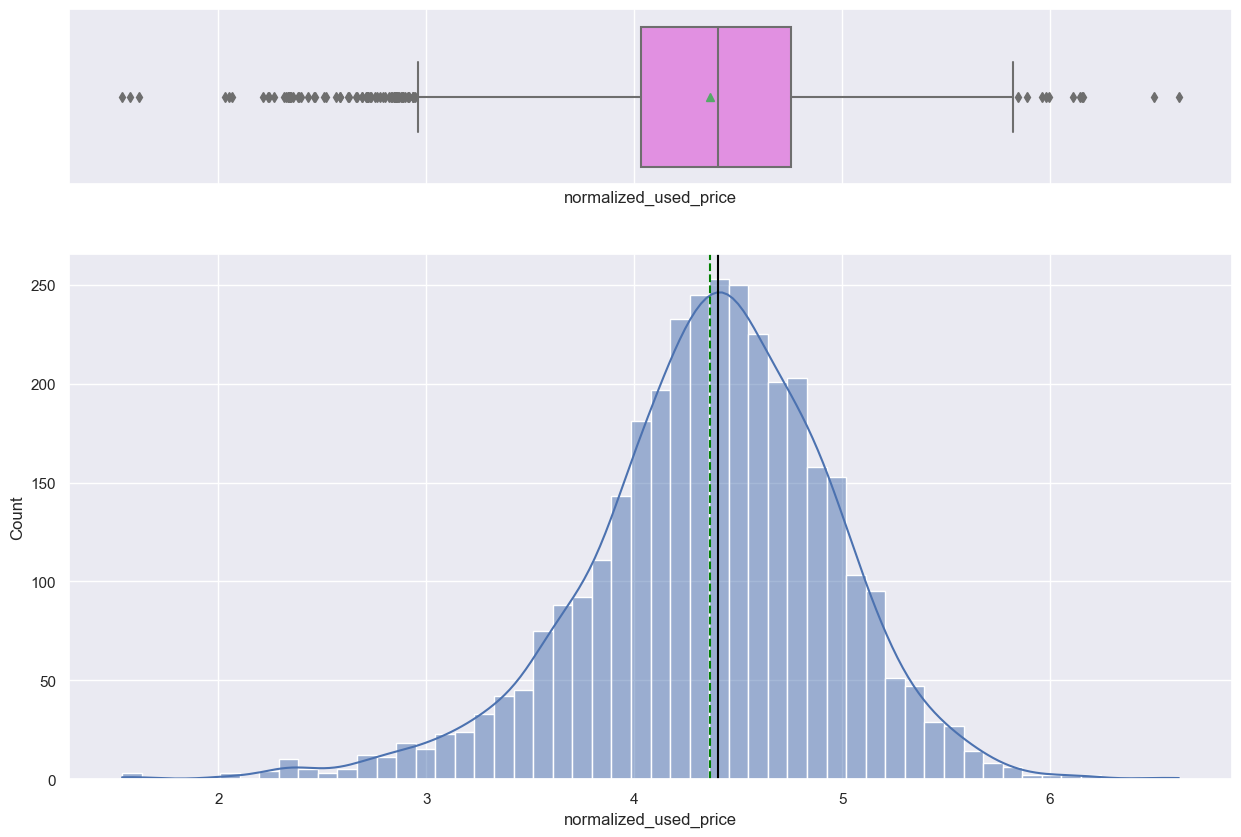

In [13]:
# now let's check "normalized used price" using the customized graph we just created for numerical values:
histogram_boxplot(df,'normalized_used_price',kde  = True);

#### Observations
- as we observed earlier that mean and median are close to each others,i.e. 4.36 & 4.41 so, the distribution close to be normal.
- also, we observe many outliers in the lower side and a little bit in the higher side

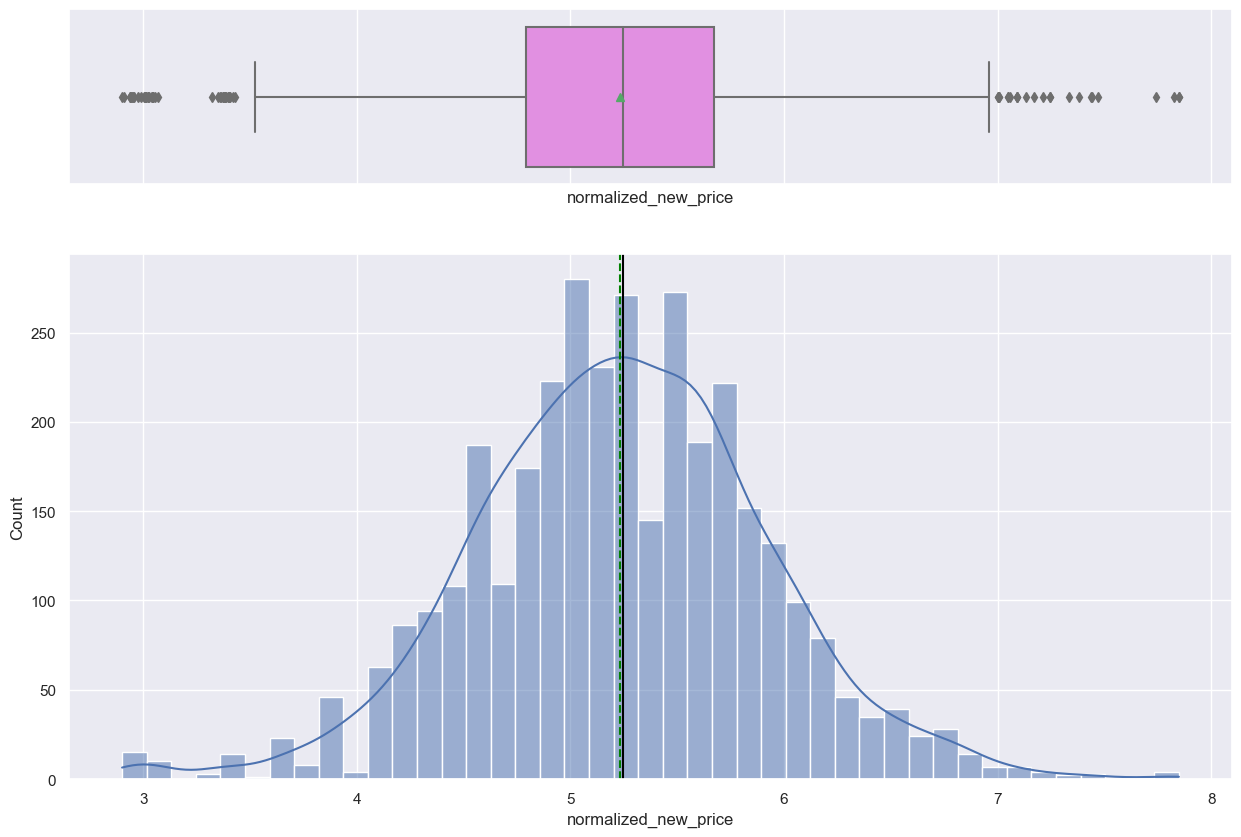

In [14]:
# let's check for normalized new price
histogram_boxplot(df, 'normalized_new_price',kde = True);

#### Observations
- as we observed earlier that mean and median are close to each others,i.e. 5.25 & 5.23 so, the distribution close to be normal.
- also, we observe  outliers in both sides

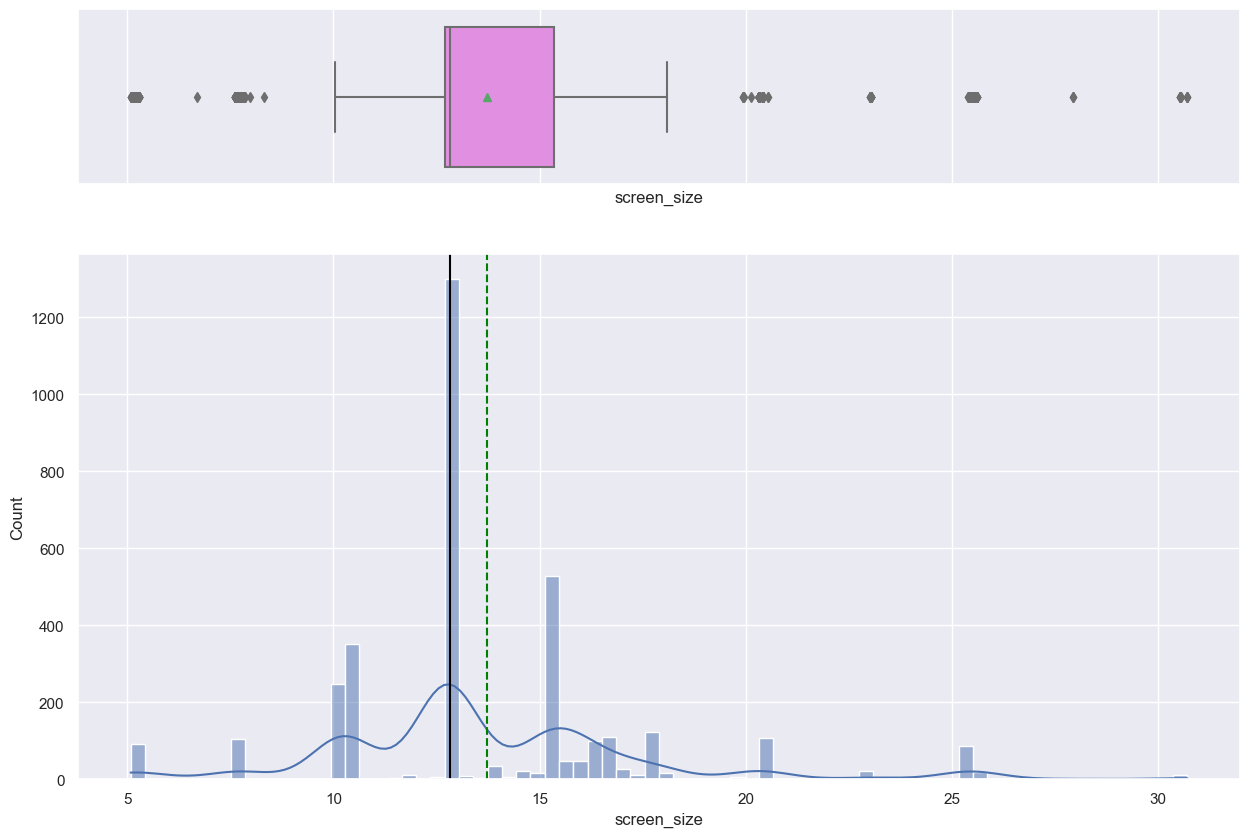

In [15]:
histogram_boxplot(df, 'screen_size', kde = True);

In [16]:
df[df.screen_size>6].shape

(3362, 15)

#### Observations
- we observe that the data is a little bit skewed to the right.
- we also observe an extreme value which represent the mode in the data, i.e most frequent screen size is 12.7.
- there are outliers on both sides.
- no. of devices have screen size bigger than 6 aroung 3362 device.

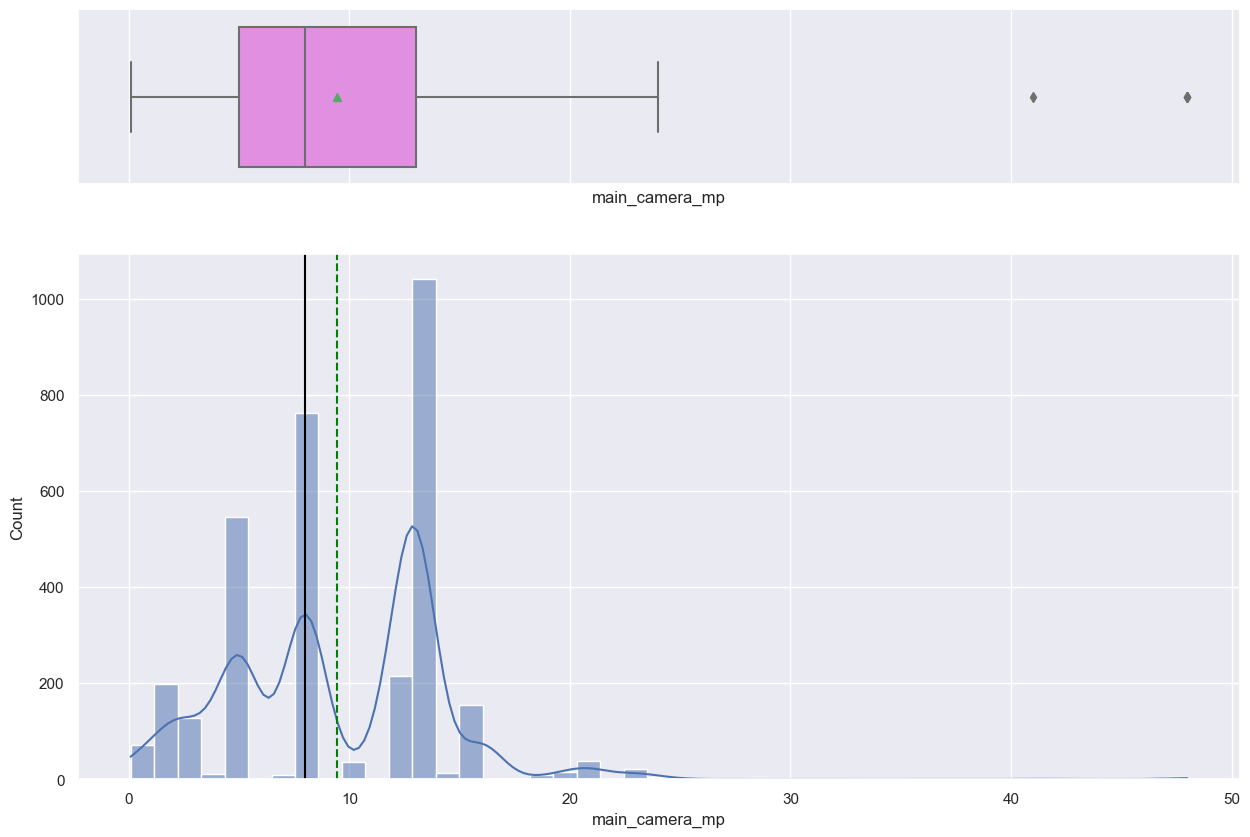

In [17]:
# will check main camera_MP
histogram_boxplot(df,'main_camera_mp', kde=True)

#### Observations
 - a few outliers are detected on the higher side.
 - most frequent main camera megapixels is 13 mp.


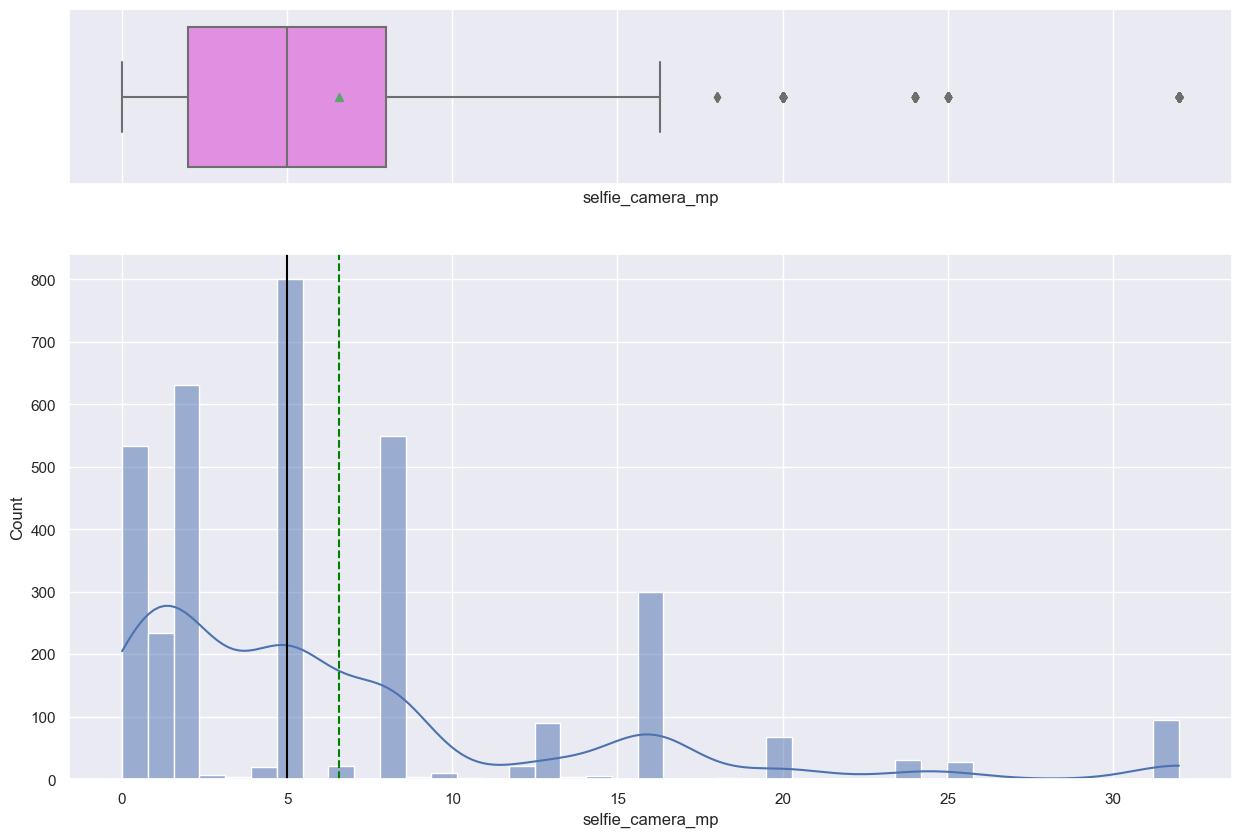

In [18]:
# will chech selfie_camera_mp
histogram_boxplot(df,'selfie_camera_mp',kde=True)

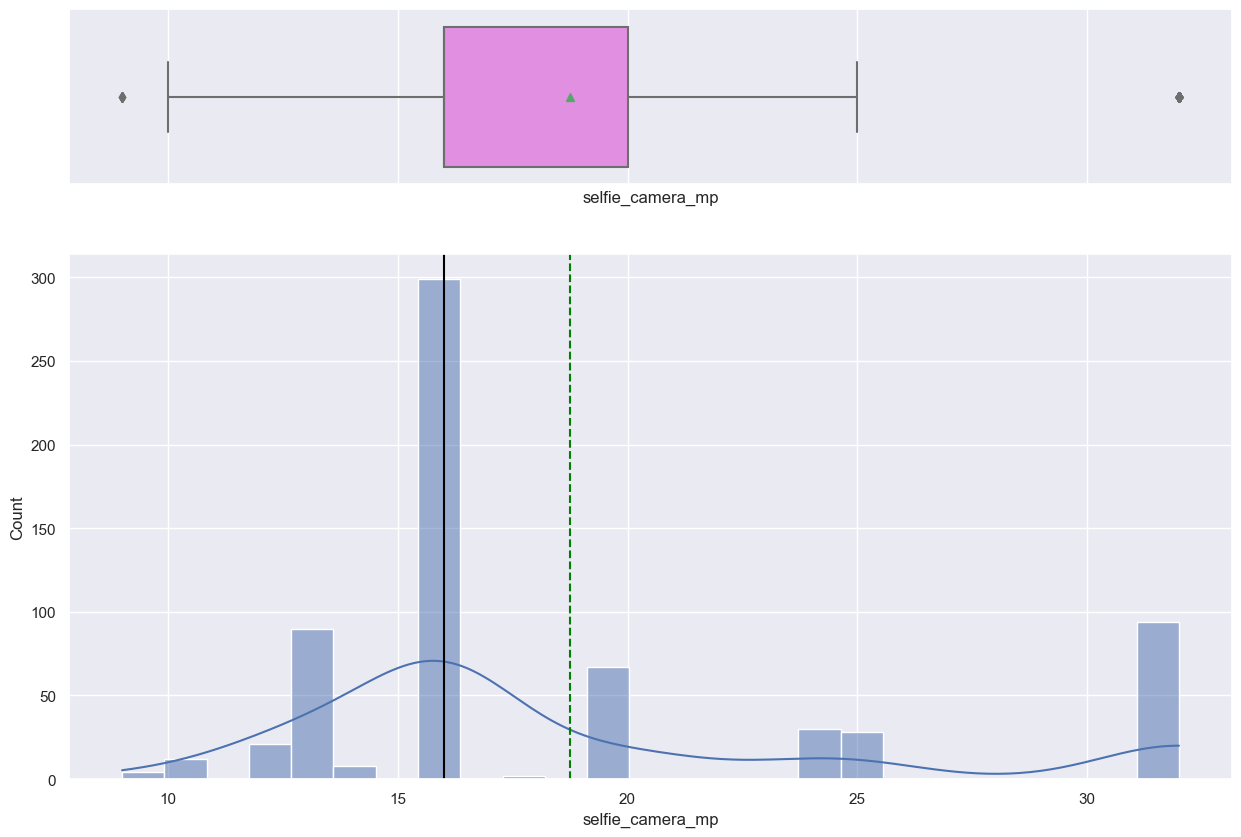

In [19]:
# will check the distribution of devices having selfie cameras above 8 mp
Above8mp = df[df.selfie_camera_mp>8]
histogram_boxplot(Above8mp, 'selfie_camera_mp', kde = True)

#### Observations
- data seems to be right sekewd to the higher side.
- median and mode are same as 5 mp which mean that 5mp is the most frequent selfie camera megapixles in the data.
- distribution of devices having s.cameras above 8mp is right skewed and have extreme value which indicate that 16GB is the most frequent S.camera megapixel for availble devices having more 8 mp onwards.

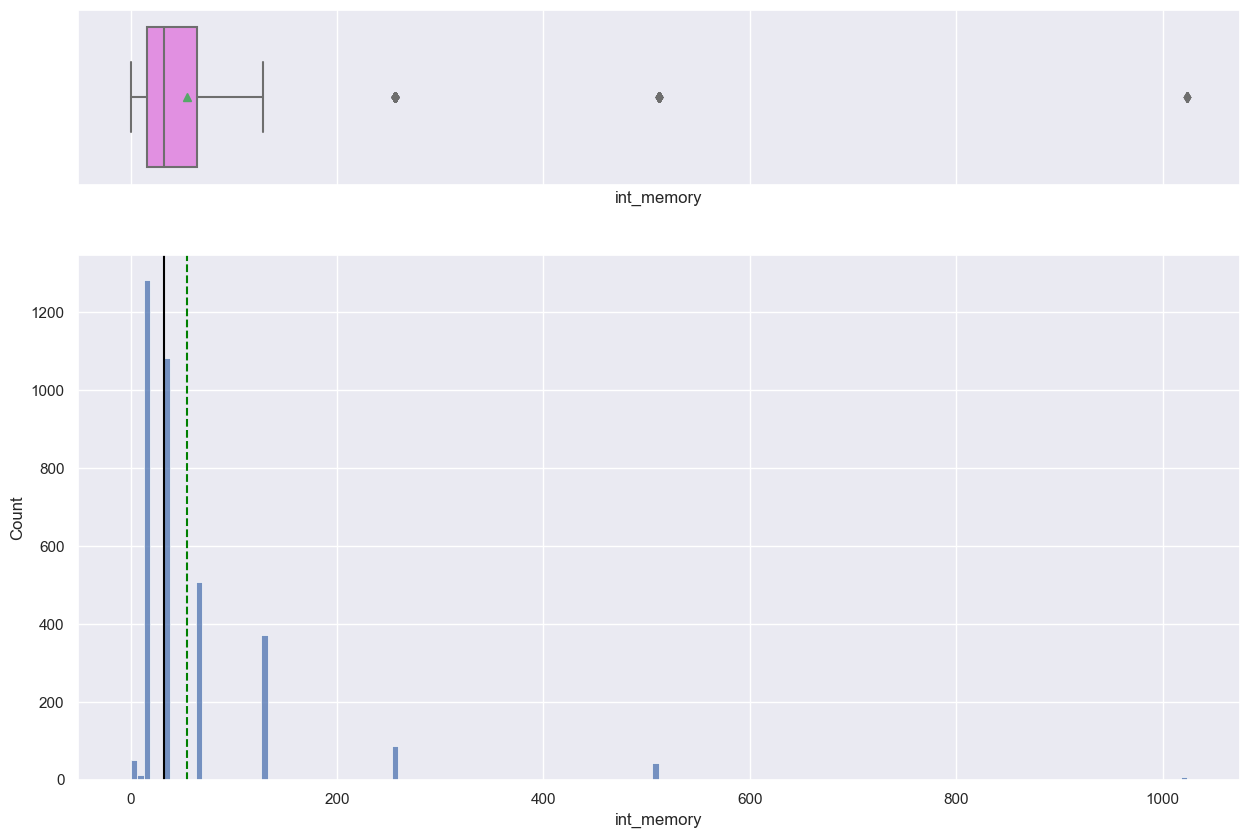

In [20]:
# will check the internal memory
histogram_boxplot(df,'int_memory')


#### Observations
- the data seems to be right skewed.
- mean is higher than median.
- there are a few outiers on the right side.

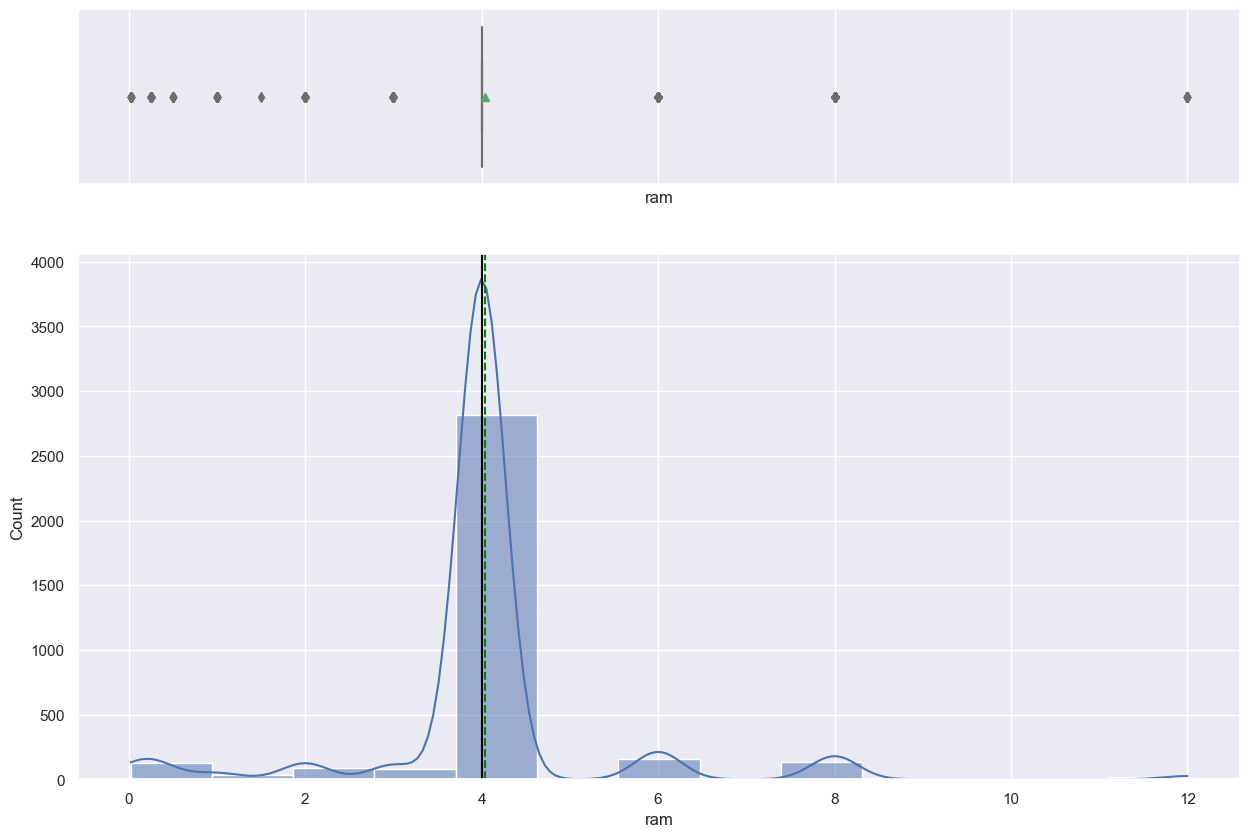

In [21]:
# will check ram
histogram_boxplot(df,'ram',kde=True)

#### observations
- we observe that 4GB ram is the most frequent ram size among the devices where 1.5 ram is the lowest.
- we observe many outliers 

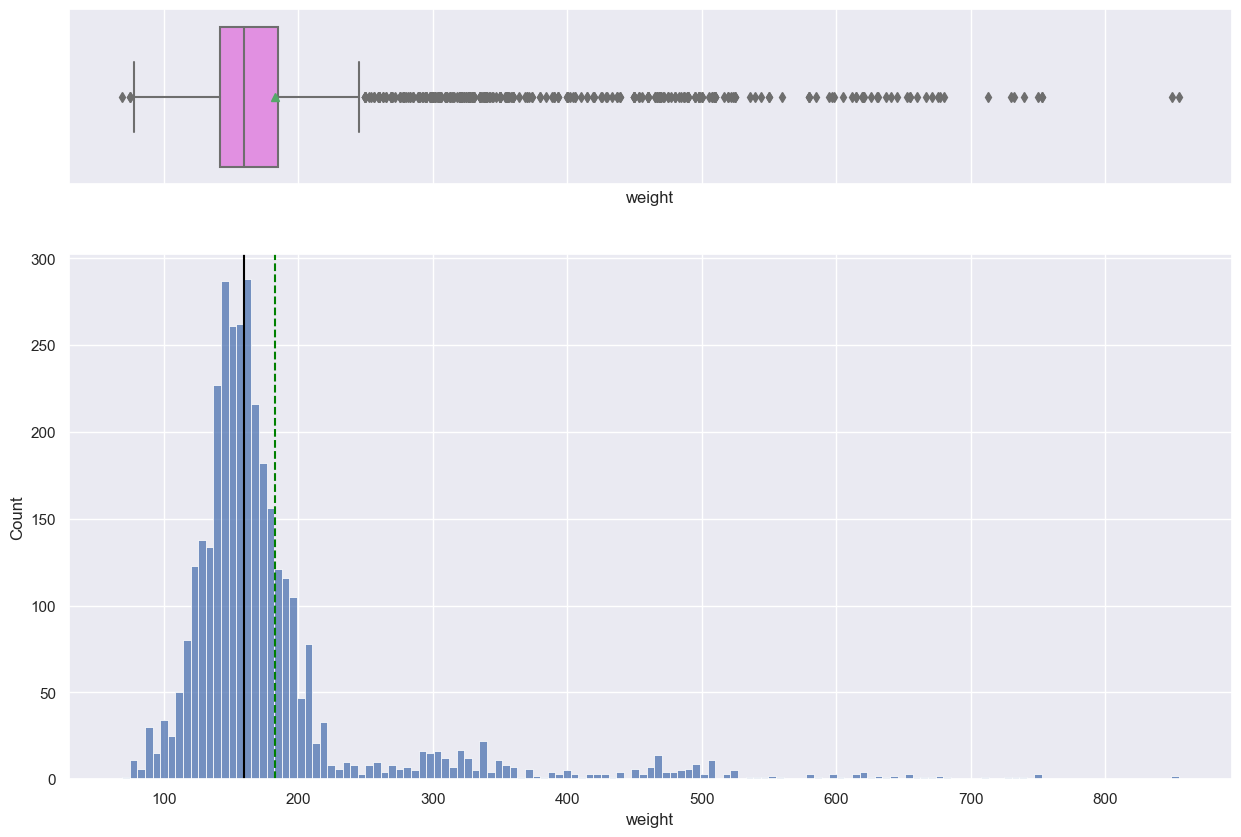

In [22]:
# will check the weight
histogram_boxplot(df,'weight')

#### Observations
- the data looks like skewed to the right with many outliers on the higher side
- mean is higher than median

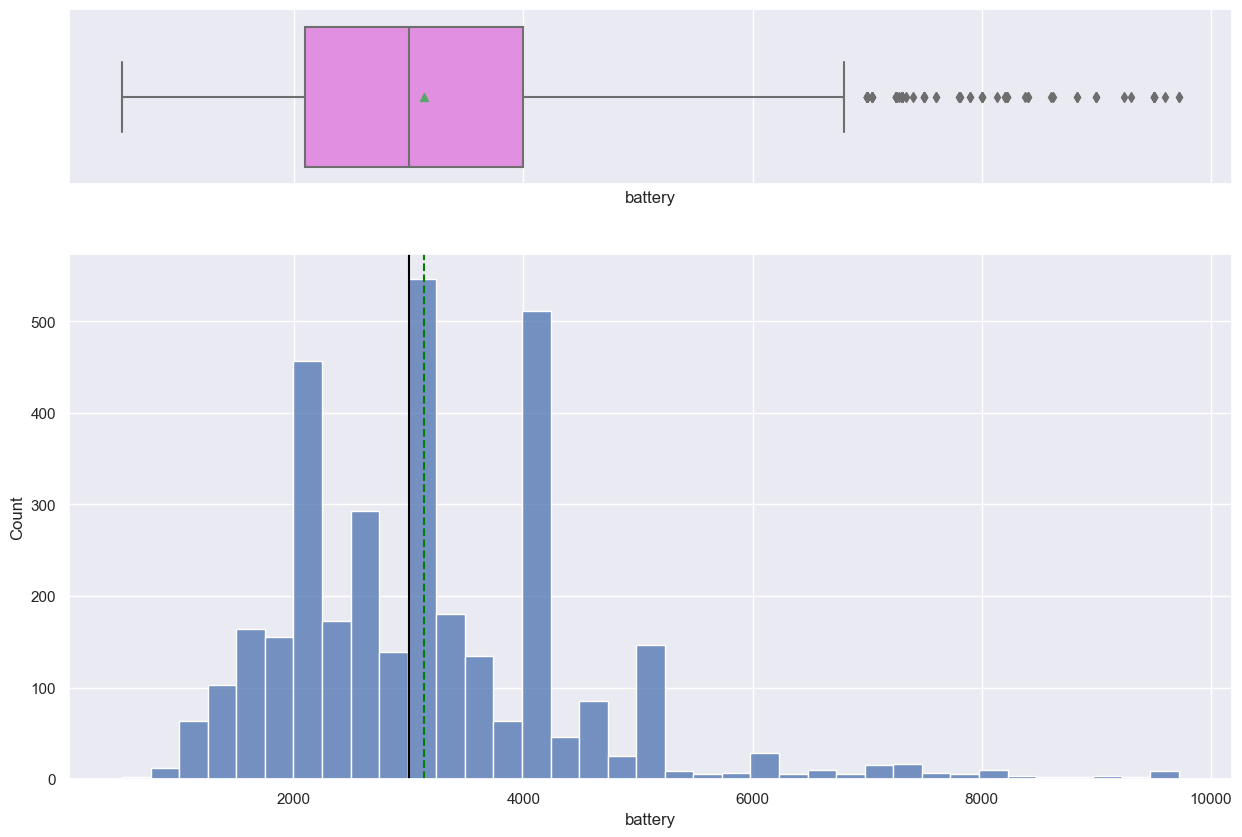

In [23]:
# will check the battery
histogram_boxplot(df,'battery')

#### Observations
- data shows many outliers on the higher side.
- mean is higher than median in the dataset.

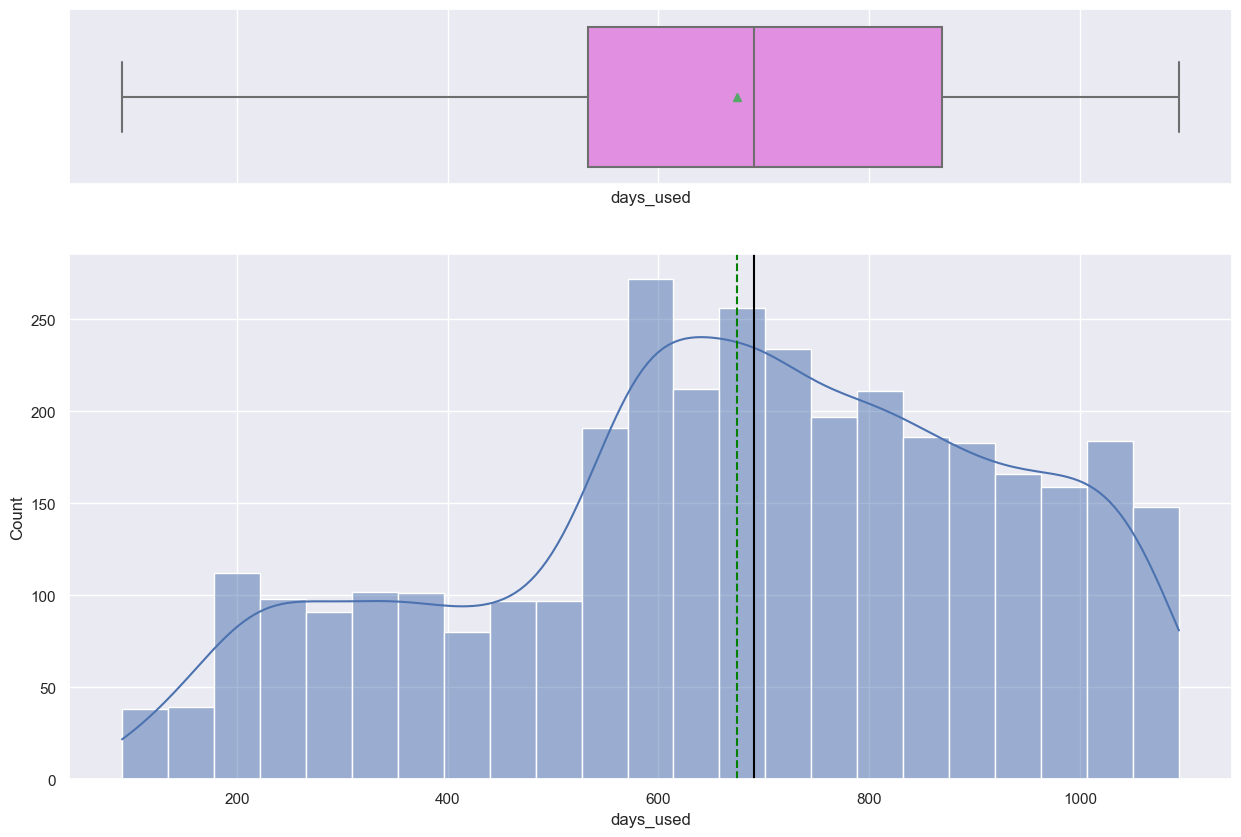

In [24]:
# will check days used
histogram_boxplot(df,'days_used', kde = True)

#### Observations
- median is higher than mean which the data is little skewed to the lower side (left).

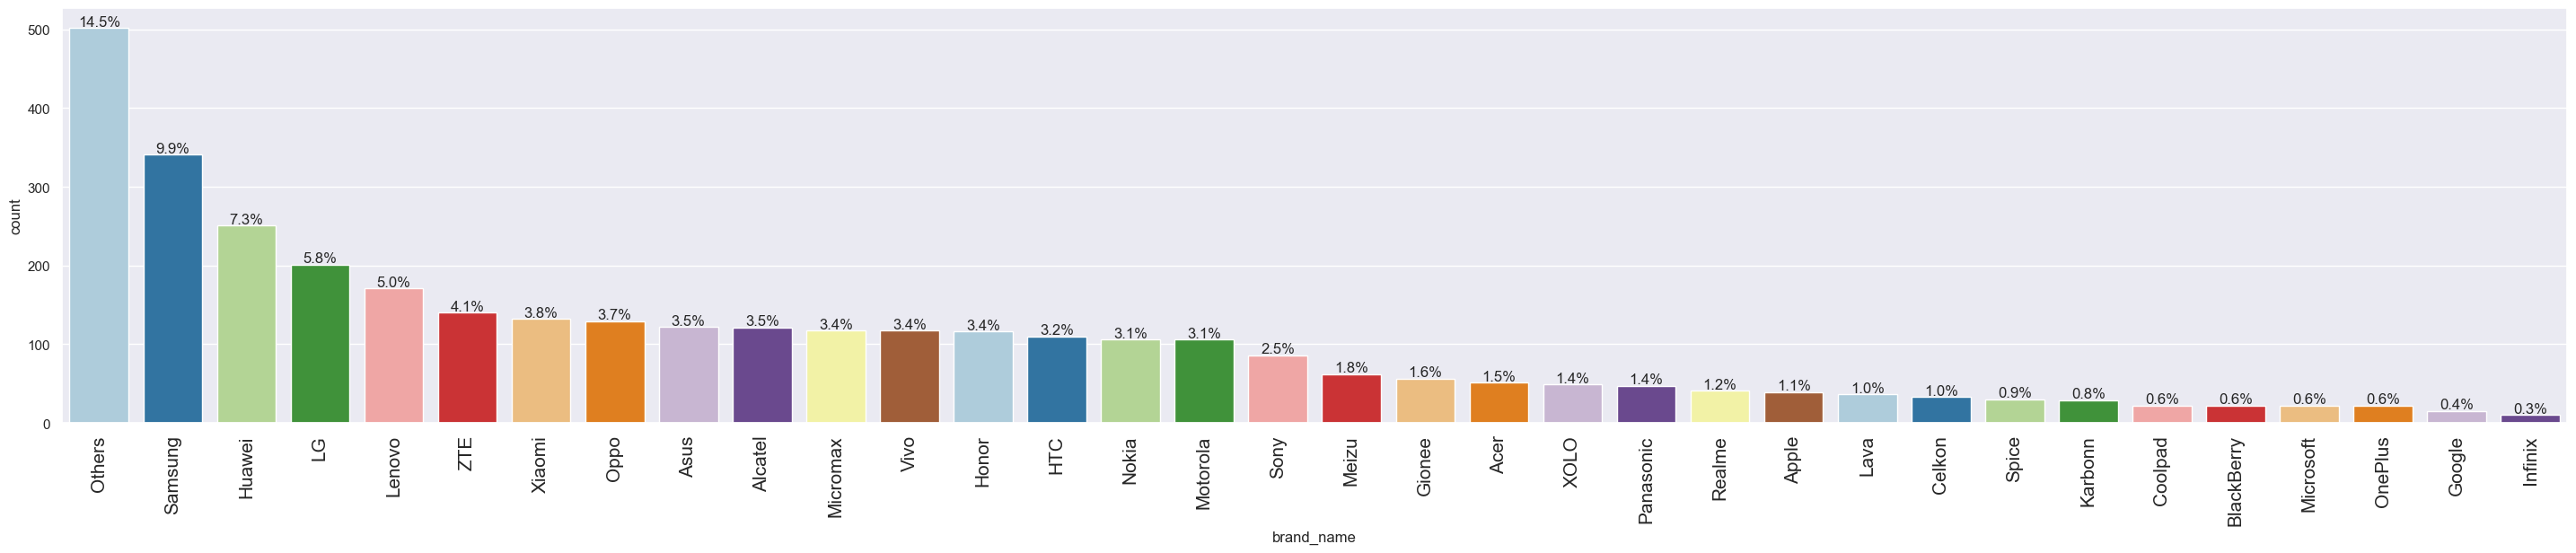

In [25]:
# will check brand name using labeled barplot as this is categorical data.
labeled_barplot(df,'brand_name', perc=True)

#### Observations
- we observe that Samsung is the most frquent specified brand for used devices @ 14.5% and infinix is the lowest 

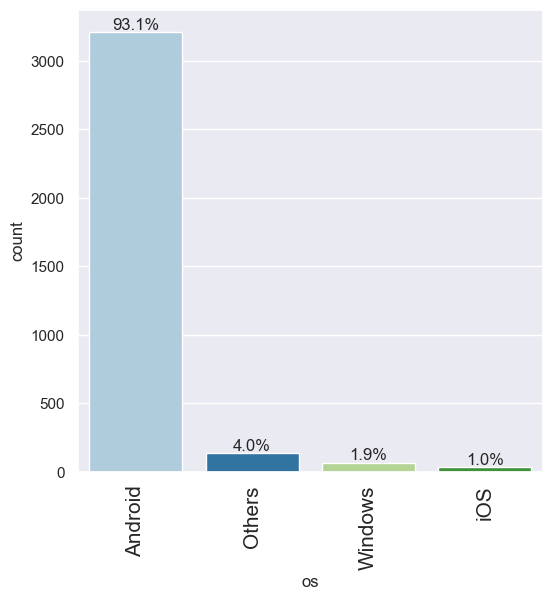

In [26]:
# will chesk OS also using labeled barplot
labeled_barplot(df,'os',perc = True)

#### Observations
we observe that Android is the most frequent used in the used mobile devices with percentage of 93%.

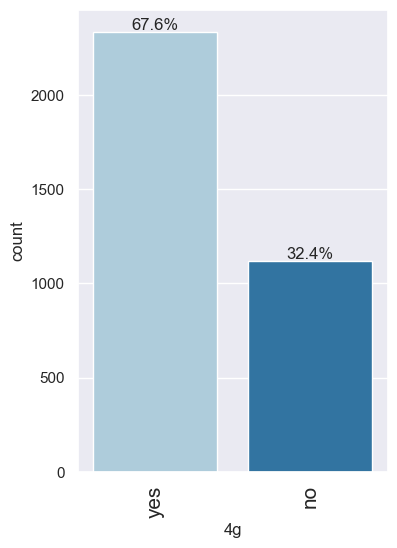

In [27]:
# will check for 4g
labeled_barplot(df,'4g',perc=True)

#### Observations
- we observe that devices with 4g network is biger than others networks

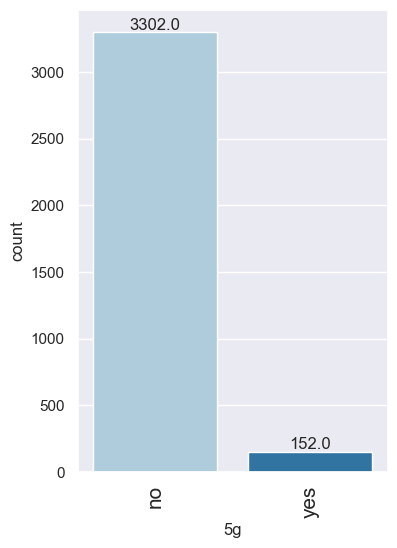

In [28]:
# will check for 5G
labeled_barplot(df,'5g')

#### Observations
- number of devices have 5g nework is 3302.

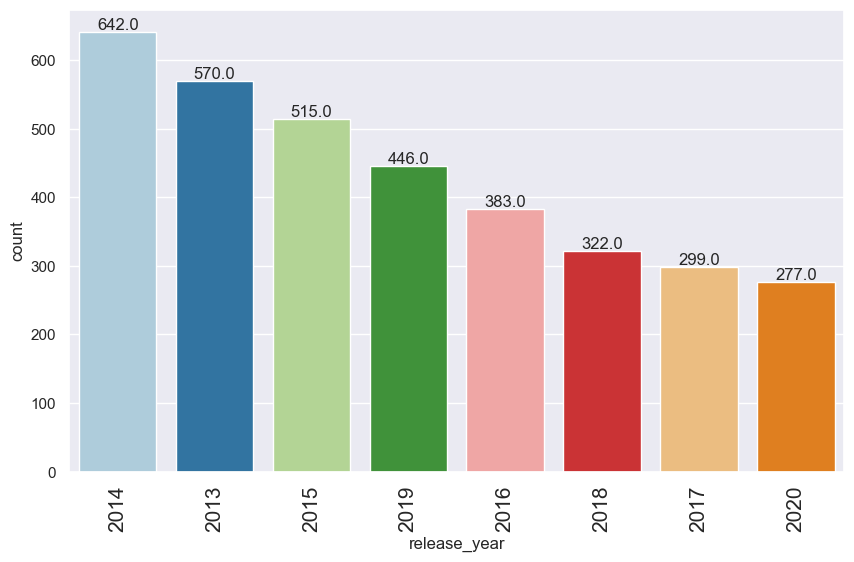

In [29]:
# will check the release year
labeled_barplot(df,'release_year')


#### Obseravation
- we observe that year 2014 is most frequent release year of the devices however, year 2020 is the lowest.

## 2 - Bivariate Analysis

#### 2.1 correlation identifications for dataset features

In [30]:
## let's do heatmap to check the corr. between numerical variables
# first let's make a list of columns with numerical values.

num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [31]:
# will remove release year column being an extra information not required in this analysis.
num_col.remove('release_year')

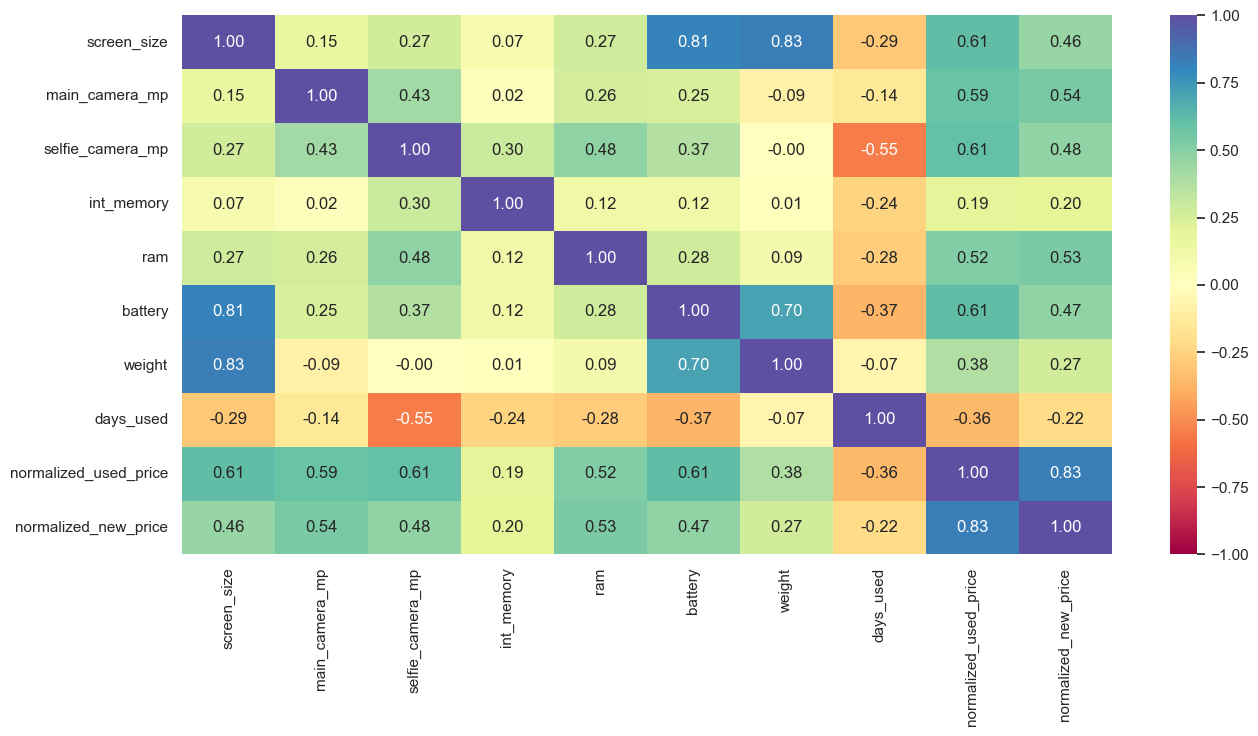

In [32]:
# now, we ready to do heatmap for all numerical variables in the dataset
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


#### Observations
- we observe that battery, screen size and weight have the most strong positive correlation in the dataset.
- also, there is somehow negative correlation between battery, selfie camers mp and days used. 

#### Q3:The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

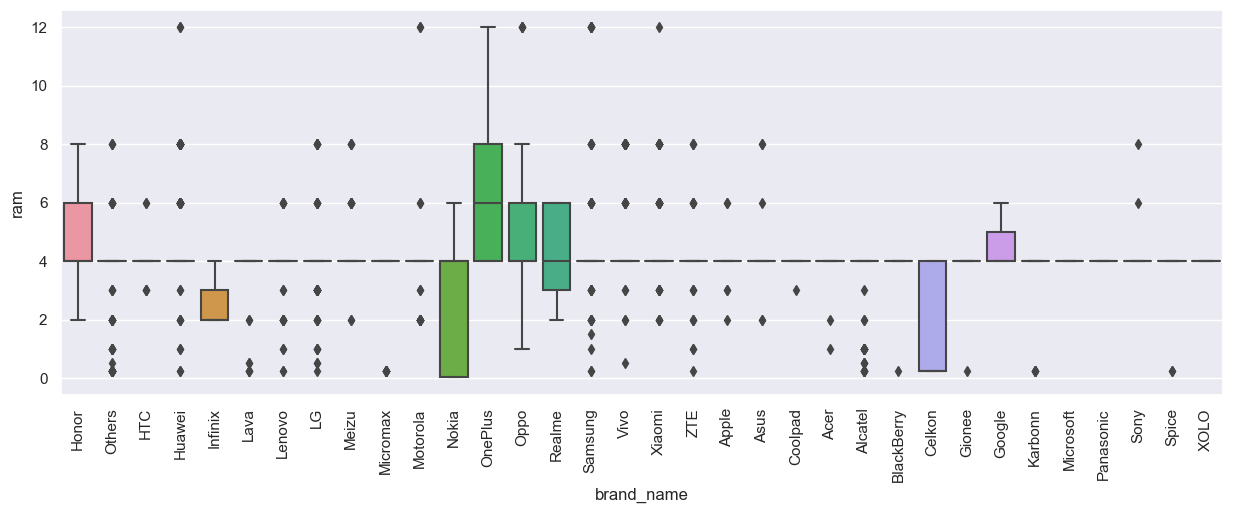

In [33]:
# let's check how Ram varies across brands by using boxplt graph between both variable.

plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()


#### Observations
- We observe that ram 4 is most frequent used in most of the brands and represet the mode of that column.
- Ram 12 is the maximum used ram in few brands such as Huawei,Motorola, Oppo,Samsung and Xiaomi and onePlus is the most brand has higher rams than 4.
- Nokia and Oneplus are the lowest brands having rams below 4.

#### Q4: 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [34]:
# first, let's create separate data frame with data of battery more than 4500 mAh.
Above4500 = df[df.battery>4500]

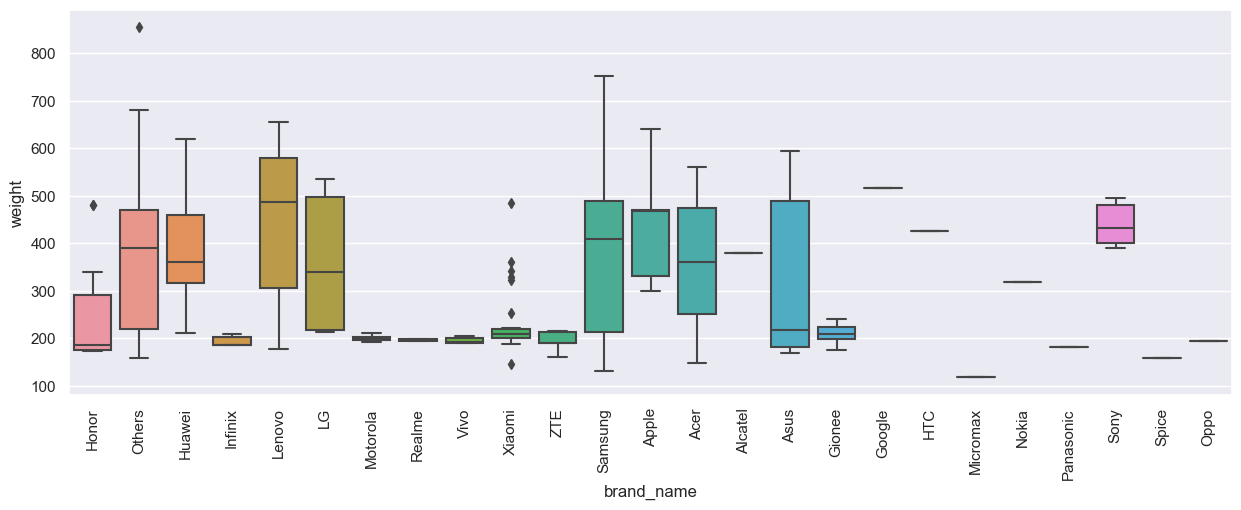

In [35]:
# now let's plot them using boxplot for brand name vs weight 
plt.figure(figsize=(15,5))
sns.boxplot(Above4500,x = 'brand_name', y = 'weight')
plt.xticks(rotation = 90);

#### Observations
- we observe that brands such as Samsung,and others are the most brand having large variation in weight.
- we observe that some brands' weights' have been affected to be high increased such as lenovo is the higest, Samsung and Sony are following that as well.
- we observe that some brands such as Motorola and realmes,... have a low impact on their weight.

#### Q5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [36]:
# let's make new data frame with the all screen size above 6 inches 
screen_above_6 = df[df.screen_size > 6 ]
print(f'Number of phones and tablets are availble across diff. brands with more than 6 inches screen size is {screen_above_6.shape[0]}')

Number of phones and tablets are availble across diff. brands with more than 6 inches screen size is 3362


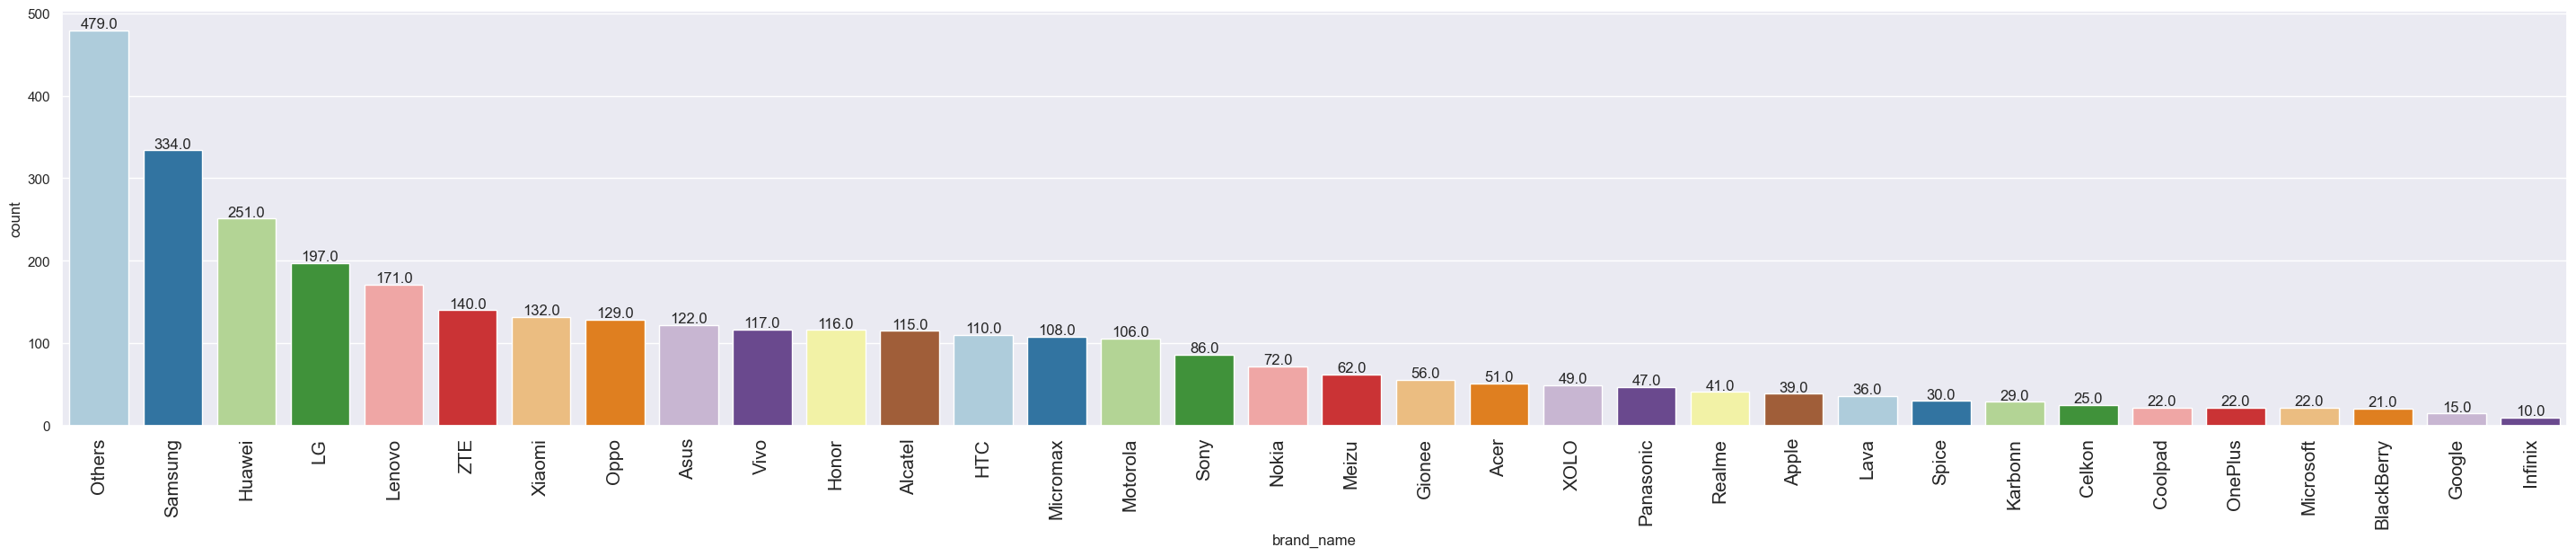

In [37]:
# now, let's  plot the new data frame just created  by brand name using l.barplot defined func()
labeled_barplot(screen_above_6,'brand_name')

## Observations
- We observe that Samsung brand is the most specified brands across others devices which having screens more than 6 inches
- However, Infinix the lowest one across other devices.

#### Q6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [38]:
# create new dataframe with all devices having selifie camera greater than 8MP.
selfie_CamAbove_8 = df[df['selfie_camera_mp']>8]

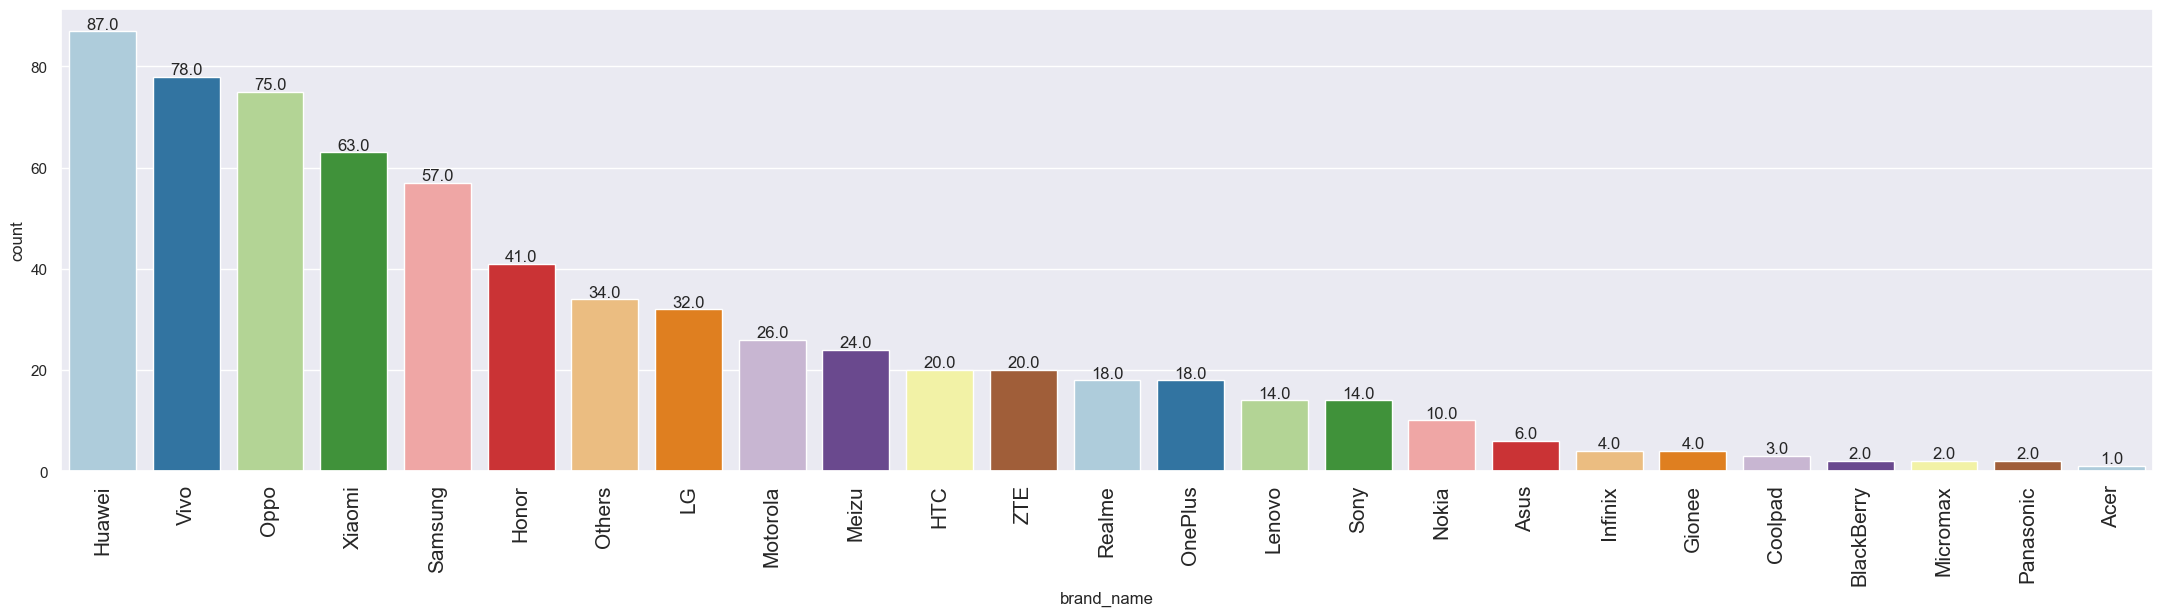

In [39]:
# then, will plot them using l.barplot func()
labeled_barplot(selfie_CamAbove_8,"brand_name")

#### Observations
- The most brand of devices having selifie camera greater than 8 mp is Huawei and the lowest one is Acer.
- Also, we observe that such famous brands like Apple is not included in the abpve list and Samsung brands comes in the ranking 5th.

In [40]:
# let's do the same analysis for the main camer aswell, but in this case will compare based on 16 mp.
main_CamAbove_16 = df[df['main_camera_mp']>16]

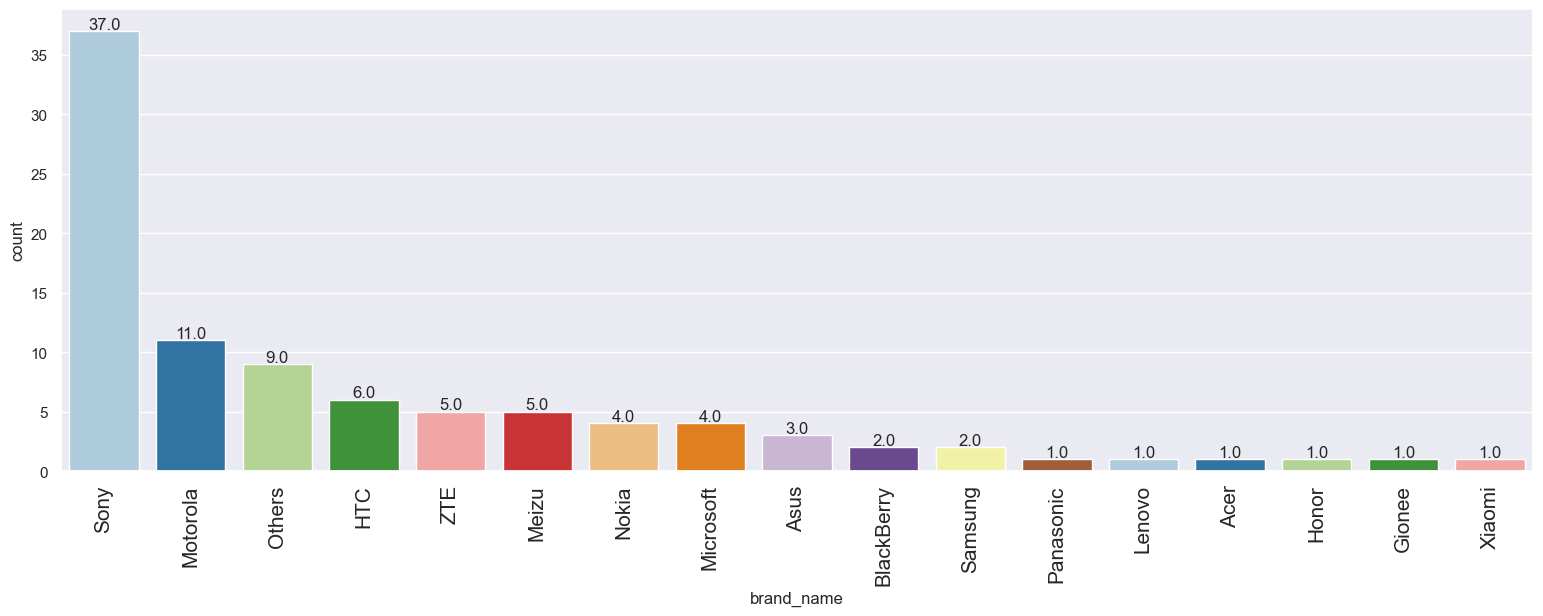

In [41]:
# let's do the ploting
labeled_barplot(main_CamAbove_16,'brand_name')

Observations
- we observe that Sony becoms the most phones having main camera more than 16mp and xiaomi is the lowest one
- also, the famous brands such as Samsung comes in bottom ranking and Apple still not included

#### Q8: how the prices of used devices varies across the release year

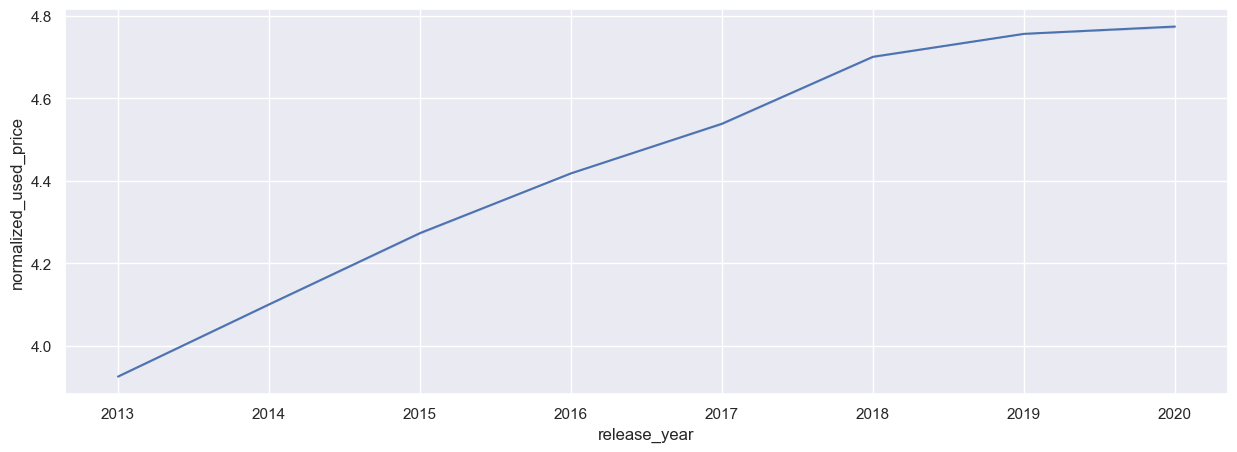

In [42]:
# we shall use lineplot to represent the relation
plt.figure(figsize=(15,5))
sns.lineplot(df,x = 'release_year', y = 'normalized_used_price',errorbar=('ci',False));

#### Observations
- we observe that the newest year is, the prices of used devices are increasing.

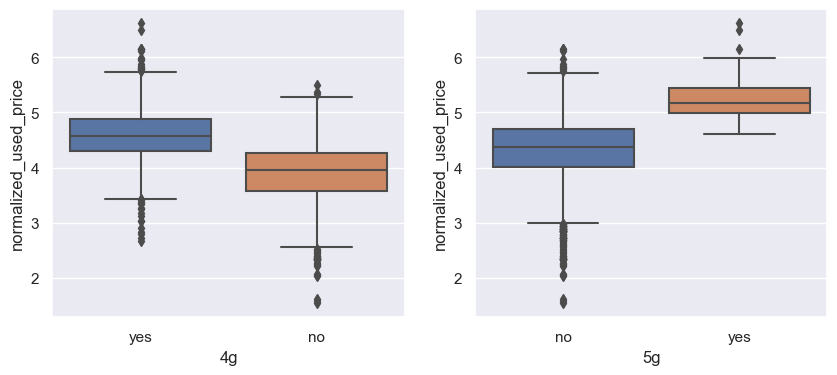

In [43]:
# let's also check how the price varies vs networks powers such as 4g and 5g
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

#### Observations
- we observe that median of devices of 5g network is higher than the one with 4g.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value Treatment

In [44]:
# first, let's take a copy from the data to keep the original date remians unchanged.
df1 = df.copy()

In [45]:
# let's explore the missing data in the dataset using isnull ()
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [46]:
# now, let's save all columns of missing data in variable called "miss_col"
miss_col = ['main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight']

# since above columns have ouliers, so, we'd prefer to impute missing data with median.
# for such, we'll impute the null values by the median of grouping release year and brand name

for col in miss_col:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median"))
# now, let's check for missind data again

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [47]:
# let's create new data frame for the remaining missing data called miss_col_2
miss_col_2 = ['main_camera_mp','selfie_camera_mp','battery','weight']

# now let's impute the remaining missing values with median grouping by brand name
for col in miss_col_2:
    df1[col] = df1[col].fillna(value=df1.groupby(['brand_name'])[col].transform("median"))
# so, let's check the missing value more one time
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [48]:
# now, let's fillna of Main_camera missing value with its median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].mean())

# so, let's check the missing values for the last time 
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Feature engineering

In [49]:
# looking the column release year which it may not be useful as it is.
# so, we'll convert it to device Age instead by subtracting each relase year from the current year

df1['phone_age'] = 2023 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
# nnow let's make sure that release year col is no more in the dataset.
df1.columns


Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'days_used', 'normalized_used_price', 'normalized_new_price',
       'phone_age'],
      dtype='object')

#### Outlier detection and treatment

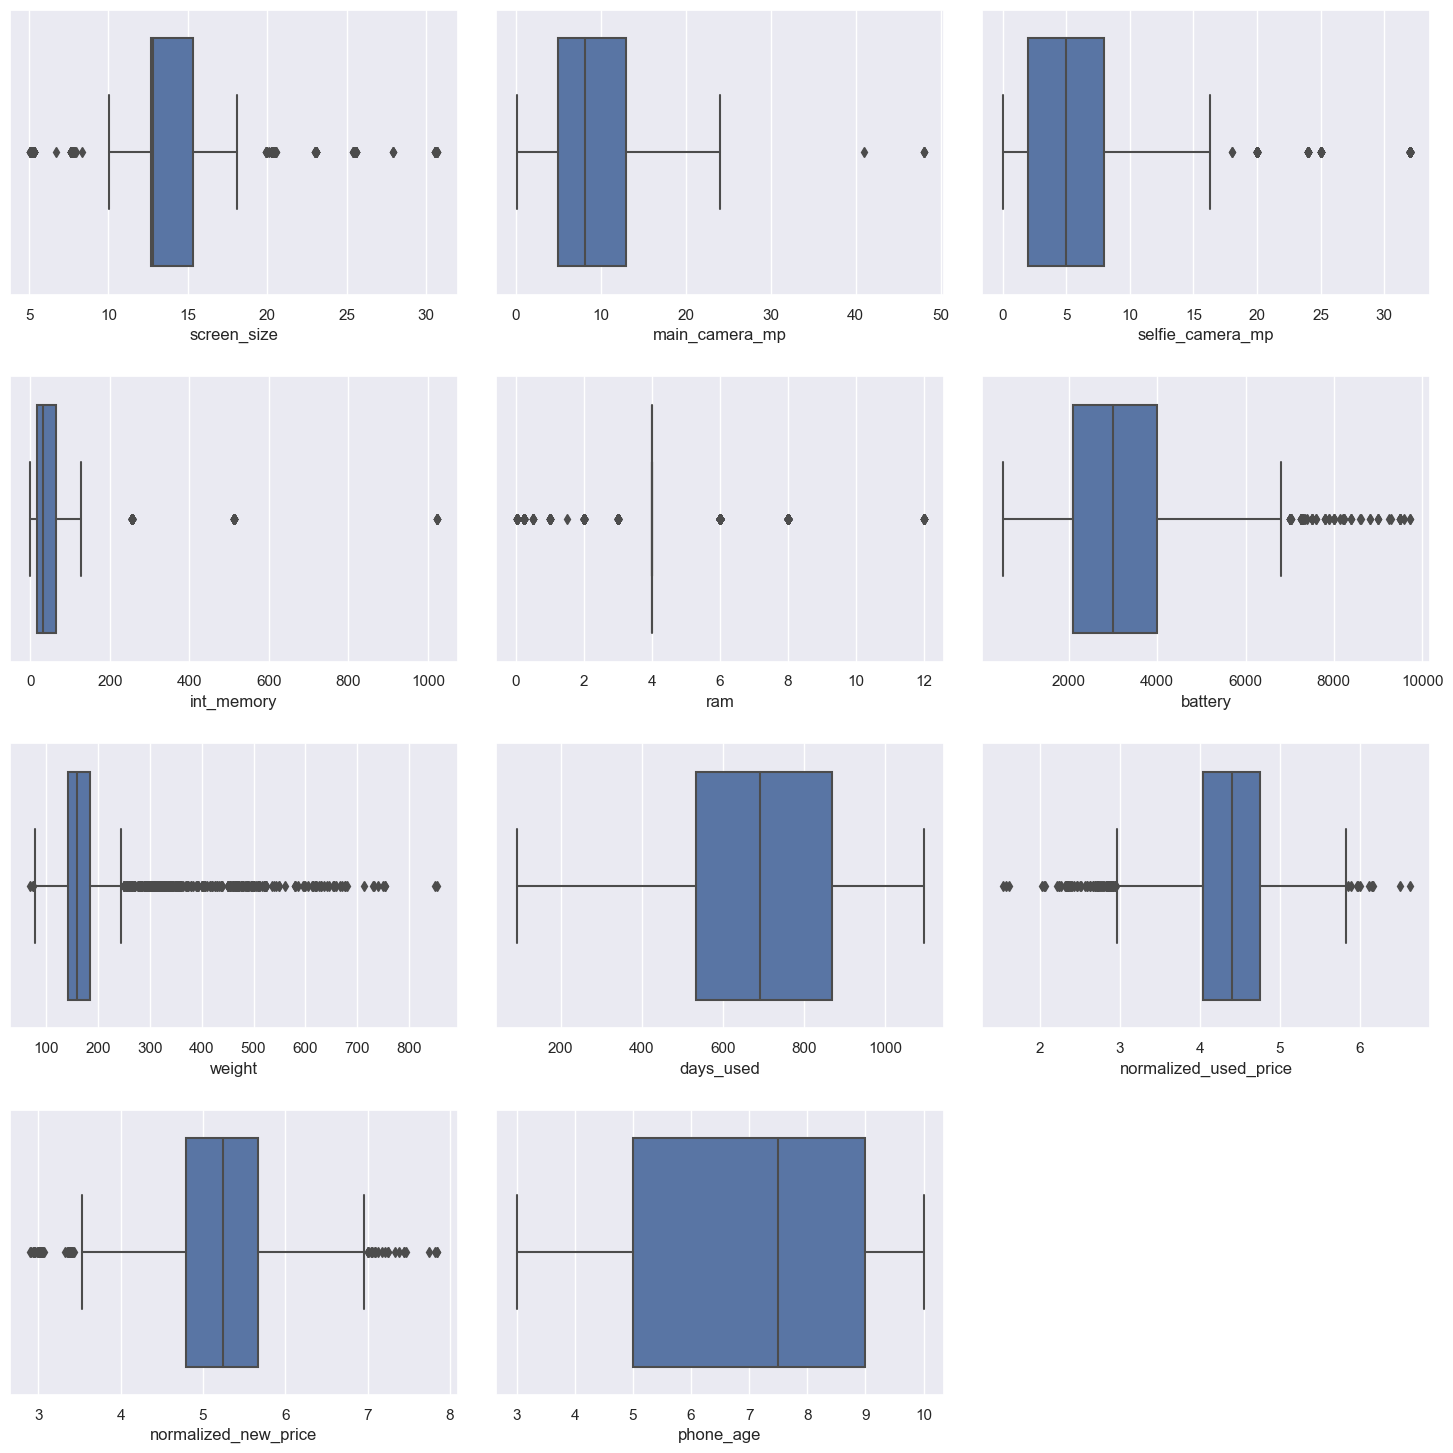

In [50]:
# let's create num_cols again to check the outlier and ploting them using boxplot
num_cols2 = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols2):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Observations
- we observed that most of the data above have outliers which is Weight is the most.

#### Preparing data for modeling
- first, we may encode the categorical data to numerical using get_dummies()
- we shall split the data to X and y ( for training and testing as well)
- we will be then buidling the linear regression model 
- lastly is the model evaluation and testing

In [51]:
# first, let's define the X, and y Variables

X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  phone_age  
0              4.715100          3  
1              5.519018          3  
2              5.884631          3  
3              5.630961          3  
4              4.9478

In [52]:
# now, let's add the intercept to data
X = sm.add_constant(X)

In [53]:
# let's convert all cats. data to numerical by pandas get dummies func().
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True) 

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [54]:
# now the data is ready for spliting for training and testing, will do in ratio 70:30

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [56]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           21:12:01   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations
- looking to summary above, indicate the below:
- R-squared value is high which 0.845, i.e. 85% of the data is explained
- Adjusted. R-squared also is high, i.e. 0.842 which indicate a good fit.


## Model Performance Check

- For model performance check, will be using below functions:
  - RMSE: root mean squared error
  - MAE: Mean Abslote error
  - R2: R squared.
  - Mape: Mean Abslote percentage error
  - Adjusted R-squared

In [57]:
# let's do one function can run all of the above in one go
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance_regression(model, predictors, target):
  
   
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  
    adjr2 = adj_r2_score(predictors, target, pred)  
    rmse = np.sqrt(mean_squared_error(target, pred))  
    mae = mean_absolute_error(target, pred)  
    mape = mape_score(target, pred)  

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

In [58]:
# check the performance of model training set (70%)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [59]:
# checking the performance model of test set (30%)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


#### Observations

- The training R2 is 0.84, so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting
- MAE refer to that the model can predict price of used phone within a mean error of 0.18 or 18% on the test data


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### Assumptions for linear regreassion are below:

- No Multicollinearity
- there should be a linear relationship between dep. and ind.
- Independence of residuals
- residuals must be normal distributed
- No Heteroscedasticity

#### 1 - Checking the Non-Multicollinearity

#### For such, we shall use Variance Inflation Factor (VIF)

- General Rule of thumb:
- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

In [60]:
# let's define function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [61]:
checking_vif(x_train)

,feature,VIF
0,const,240.588307
1,screen_size,7.677290
2,main_camera_mp,2.284218
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


#### Observations
- There are many columns have  VIF values above 5 which refer to a strong multicollinearity and many have lower than 5 which indicate low multicollinearity.
- We shall drop numerical columns with VIF > 5
- We shall aslo ignore the VIF values for dummy variables and the constant (intercept)

#### Removing multicollinearity:

- Drop every column one by one that has a VIF score greater than 5.
- Look at the adjusted R-squared and RMSE of all these models.
- Drop the variable that makes the least change in adjusted R-squared.
- Check the VIF scores again.
- Continue till you get all VIF scores under 5.

In [62]:
# now, let's define a function for removing storng multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    
    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)] 
        olsmodel = sm.OLS(target, train).fit()
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [63]:
col_list = ['screen_size','weight'] 
res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [64]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,211.804966
1,main_camera_mp,2.281003
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,phone_age,4.730315


#### Observations
- `after dropping screen size VIF is lower than 5 except dummies which is ok.

In [65]:
# just now, we treated the multicol. let's rebuild the model again
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           21:12:02   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations
- We observe that adjusted-R2 has been decreased slightly to 0.838 which is still good.
- we observe too that no high VIF in the dataset after droping screen size.
- However, we notice that some of p-values are hight than .05. so, we should drop them as well.

#### Dropping p-values higher than 0.05
- criteria:
- we will drop only p-values bigger/highest than 0.05 as those will not have any impact.
- we will drop them one by one as p-values keep changing by dropping other values.
-Instead, we will do the following:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and - drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05.

In [66]:
# let's intial list of cols.
predictors = x_train2.copy() 
cols = predictors.columns.tolist()

# let's make forloop and set the max_p_value
max_p_value = 1

while len(cols) > 0:
    
    x_train_aux = predictors[cols] 
    model = sm.OLS(y_train, x_train_aux).fit()
   
    p_values = model.pvalues
    max_p_value = max(p_values)
   
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'phone_age', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [67]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [68]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     896.2
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           21:12:02   Log-Likelihood:                 81.258
No. Observations:                   2417   AIC:                            -132.5
Df Residuals:                       2402   BIC:                            -45.66
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [69]:
# checking model performance on train set (70%)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233971,0.182655,0.839321,0.838317,4.393004


In [70]:
# checking model performance on test set (30%)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24139,0.186588,0.838446,0.836073,4.55472


#### Observations

- Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with
- Now adjusted R-squared is 0.838, i.e., our model is able to explain ~83% of the variance
- The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.838
- This shows that the variables we dropped were not affecting the model
- RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

#### Now, let's check linearity of model olsmod2
criteria:
- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [71]:
# let's create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  
df_pred["Fitted Values"] = olsmod2.fittedvalues  
df_pred["Residuals"] = olsmod2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867459,0.220029
1525,4.448399,4.602042,-0.153642
1128,4.315353,4.287314,0.028038
3003,4.282068,4.194925,0.087143
2907,4.456438,4.490339,-0.033901


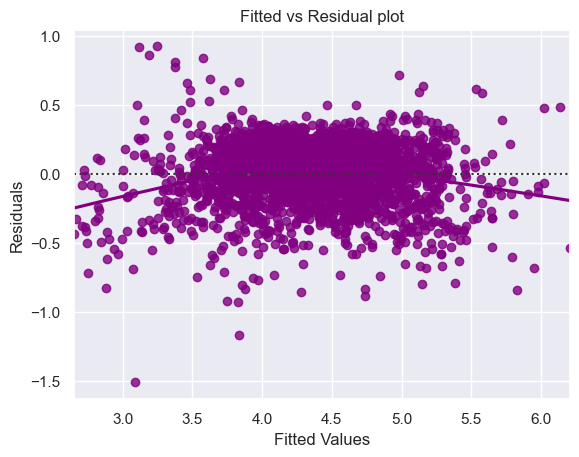

In [72]:
# then, let's plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


#### Observations
The scatter plot shows the distribution of residuals vs fitted predicted values.
We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#### let's do test of normality
criteria:
- will use histogram plot or Q-Q plot. The shape of residuals can give an initial idea about the normality.
- Other tests to check for normality includes the Shapiro-Wilk test which:
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

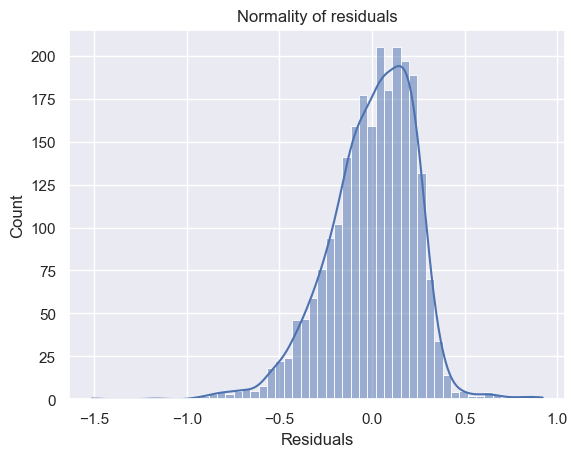

In [73]:
# Hist plot
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

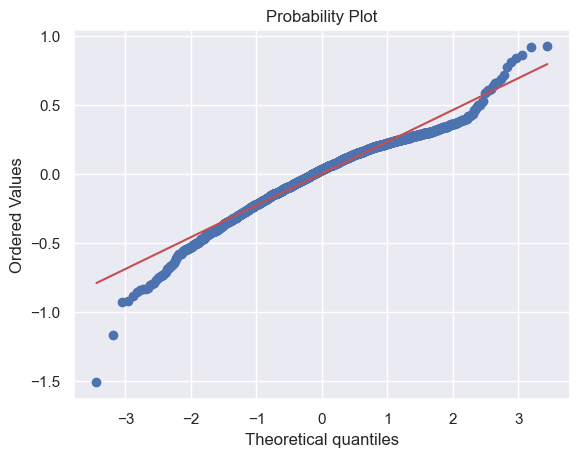

In [74]:
# the histogram does not have perfect bell-shape
# let's check the Q-Q plot

import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [75]:
## the resd. are following the straight line except tails
# let's check for shapiro wilk test.
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9677053093910217, pvalue=7.040150021144021e-23)

#### Note:
despite p-value < 0.05, the residuals are not normal; However, as an approximation, we can accept this distribution as close to being normal.
So, the assumption is satisfied.

#### let's do test for Homoscedasticity
criteria:

-The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
- The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic as under:
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [76]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0091867478011938), ('p-value', 0.4372528502022284)]

#### note:
Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.



#### since all assumptions are satisfied, let's check predections for test data

In [77]:
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385892
2341,3.696103,4.004070
1913,3.592093,3.643840
688,4.306495,4.103367
650,4.522115,5.113086
2291,4.259294,4.398529
40,4.997685,5.459878
1884,3.875359,4.053169
2538,4.206631,4.035907
45,5.380450,5.227910


#### Observations
- we observe that the new model is successful and perdicted close values to the actual numbers.

## Final Model

In [78]:
# finally we are confident to create the final model.
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [79]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     896.2
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           21:12:03   Log-Likelihood:                 81.258
No. Observations:                   2417   AIC:                            -132.5
Df Residuals:                       2402   BIC:                            -45.66
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [80]:
# checking model performance on train set (70%)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233971,0.182655,0.839321,0.838317,4.393004


In [81]:
# checking model performance on test set (30%)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24139,0.186588,0.838446,0.836073,4.55472


#### Observations

- The model is able to explain ~84% of the variation in the data which mean good model.

- The train and test RMSE and MAE are low and comparable. So, our - model is not suffering. from overfitting


## Actionable Insights and Recommendations 

___

- The model is able to explain ~84% of the variation which is very good.
- MAPE is 4.5% which mean the model is very good in predection and inference.
- If the Main camera of a used phone increases by one unit, then its price will increases by 0.0210 if all other variables held constant
- If the selfie camera of a used phone increases by one unit, then its price will increases by 0.0138 if all other variables held constant.
- If the ram of a used phone increases by one unit, then its price will increases by 0.0208 if all other variables held constant.
- If the weight of a used phone increases by one unit, then its price will increases by 0.0017 if all other variables held constant.
- If the Age of a used phone increases by one unit, then its price will decreased by -0.0291 if all other variables held constant.
- i recommend that company consider this model which explains good percentage of the data with very low possible error.
- also, encourage the operation team to focus to get the most best features to the most famous phone brands such as Apple and Samsung as those phones are best sellers and always focus on the main and selfie camers features. 